Temel görüntü işleme fonksiyonları

In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

import torch
import kornia
import torchvision


In C:\Users\selcu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\selcu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\selcu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
img_bgr = cv2.imread("../KendiResmim.jpg", cv2.IMREAD_COLOR)
print(img_bgr.shape)


(1198, 1198, 3)


In [3]:
x_bgr = kornia.image_to_tensor(img_bgr, keepdim=False)
print(x_bgr.shape)

torch.Size([1, 3, 1198, 1198])


In [4]:
x_bgr = kornia.image_to_tensor(img_bgr)
x_rgb = kornia.bgr_to_rgb(x_bgr)
print(x_rgb.shape)

torch.Size([3, 1198, 1198])


Create batch and normalize

torch.Size([2, 3, 1198, 1198])


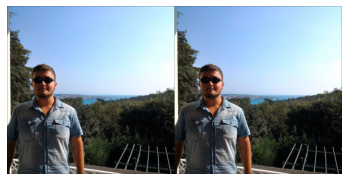

In [5]:
x_rgb = x_rgb.expand(2, -1, -1, -1)
x_rgb = x_rgb.float() / 255.0
print(x_rgb.shape)

def imshow(input):
    out = torchvision.utils.make_grid(input, nrow=2, padding=1)
    out_np = kornia.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis("off")

imshow(x_rgb)

Box Blur

torch.Size([2, 3, 1198, 1198])


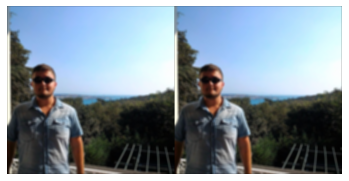

In [6]:
x_blur: torch.Tensor = kornia.box_blur(x_rgb, (19, 19))
print(x_blur.shape)
imshow(x_blur)

Median Blur

torch.Size([2, 3, 1198, 1198])


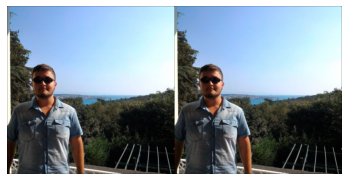

In [7]:
x_blur: torch.Tensor = kornia.median_blur(x_rgb, (5, 5))
print(x_blur.shape)
imshow(x_blur)

Gauss Blur

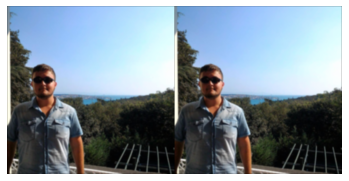

In [9]:
# kernel
# kernel_size (Tuple[int, int]): kernel size. -> (11, 11)
# sigma (Tuple[float, float]): kernel standard deviation. -> (11, 11)
x_blur: torch.Tensor = kornia.gaussian_blur2d(x_rgb, (11, 11), (11., 11.))
imshow(x_blur)
